In [1]:
using Pkg
Pkg.activate(".")
using DataPreProcessing

  Activating environment at `~/Desktop/manning-liveprojects/hands-on-datascience-with-julia/data-pre-processing/Project.toml`


In [2]:
# Project constants
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
file_sha1 = UInt8[
    0xad, 0xfa, 0x6b, 0x6d, 0xca,
    0x24, 0xa6, 0x3f, 0xe1, 0x66,
    0xa9, 0xe7, 0xfa, 0x01, 0xce,
    0xe4, 0x33, 0x58, 0x57, 0xd1
]
metadata_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names"

# Downloaded files as Vector{UInt8}
csv_content = download_file(url, file_sha1)
csv_meta = download_file(metadata_url);

In [72]:
using DataFrames
using CSV
# Get DataFrame from CSV file
cols = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing = DataFrame(CSV.File(IOBuffer(csv_content); header=cols, delim=' ', ignorerepeated=true))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


In [5]:
describe(housing)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,3.61352,0.00632,0.25651,88.9762,0,Float64
2,ZN,11.3636,0.0,0.0,100.0,0,Float64
3,INDUS,11.1368,0.46,9.69,27.74,0,Float64
4,CHAS,0.06917,0,0.0,1,0,Int64
5,NOX,0.554695,0.385,0.538,0.871,0,Float64
6,RM,6.28463,3.561,6.2085,8.78,0,Float64
7,AGE,68.5749,2.9,77.5,100.0,0,Float64
8,DIS,3.79504,1.1296,3.20745,12.1265,0,Float64
9,RAD,9.54941,1,5.0,24,0,Int64


In [6]:
nominal = names(housing, Int)
continuous = names(housing, Float64);

In [7]:
using FreqTables

In [8]:
foreach(col -> println(proptable(housing[!, col])), nominal)

2-element Named Vector{Float64}
Dim1  │ 
──────┼────────
0     │ 0.93083
1     │ 0.06917
9-element Named Vector{Float64}
Dim1  │ 
──────┼──────────
1     │ 0.0395257
2     │ 0.0474308
3     │ 0.0750988
4     │  0.217391
5     │  0.227273
6     │ 0.0513834
7     │ 0.0335968
8     │ 0.0474308
24    │   0.26087


In [9]:
using Plots

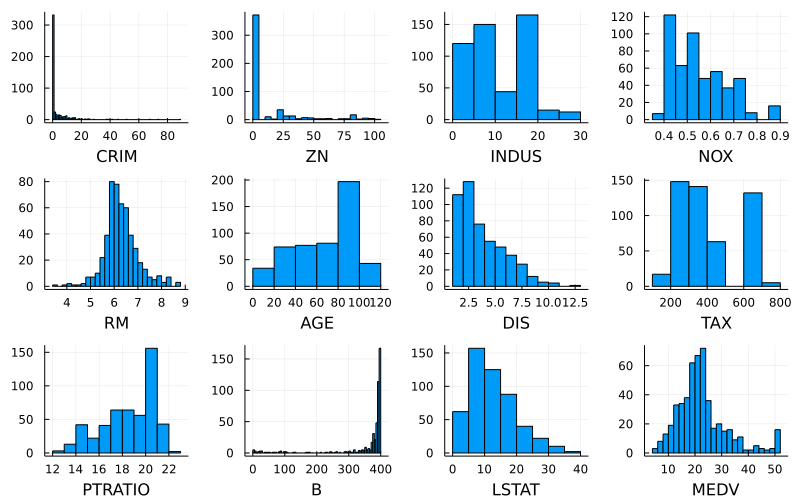

In [10]:
plots = []
for col_name in continuous
    p = histogram(housing[!, col_name], xlabel=col_name, legend=false)
    push!(plots, p)
end

# Compose a grid of histograms in a single plot
plot(plots..., layout=grid(3, 4), size=(800,500))

In [11]:
using StatsBase

In [12]:
medv_mode = mode(housing[!, :MEDV])
println("Mode of MED: $(medv_mode)")

Mode of MED: 50.0


In [54]:
# Remove MEDV values of approximately 50
housing_cleaned = subset(housing, :MEDV => ByRow(!isapprox(50.0)))
println("Previous number of rows: $(nrow(housing))")
println("Cleaned number of rows: $(nrow(housing_cleaned))")

Previous number of rows: 506
Cleaned number of rows: 490


In [60]:
# Calculate Kendall's Tau correlation matrix
corkendall(Matrix(housing_cleaned))

14×14 Matrix{Float64}:
  1.0        -0.458266    0.520867   …  -0.255792    0.483386    -0.438928
 -0.458266    1.0        -0.530466       0.121932   -0.399438     0.3565
  0.520867   -0.530466    1.0           -0.185451    0.493072    -0.448465
  0.0187153  -0.0364009   0.0570377     -0.026583    0.00639807   0.0700622
  0.594802   -0.514629    0.616625      -0.193448    0.479634    -0.428623
 -0.218774    0.279787   -0.299508   …   0.0382782  -0.455255     0.471074
  0.489837   -0.424882    0.483657      -0.145344    0.522331    -0.427413
 -0.5359      0.484681   -0.57237        0.157373   -0.452619     0.360628
  0.556161   -0.224992    0.350976      -0.206419    0.30502     -0.270892
  0.535601   -0.273946    0.474513      -0.237354    0.402941    -0.440709
  0.316977   -0.357918    0.341488   …  -0.0448801   0.32111     -0.396202
 -0.255792    0.121932   -0.185451       1.0        -0.163366     0.152093
  0.483386   -0.399438    0.493072      -0.163366    1.0         -0.658586
 -0

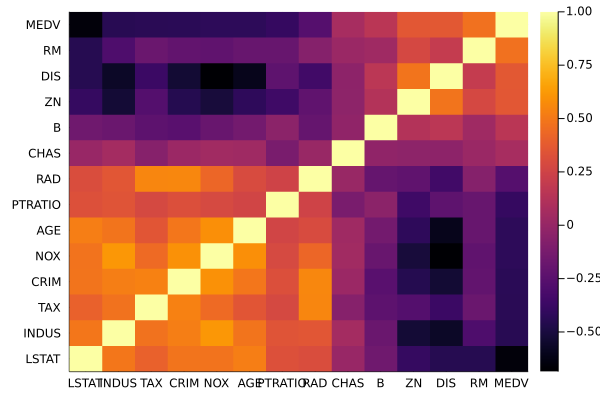

In [61]:
## Create heatmap of correlations sorted by correlation with MEDV
idxs = corkendall(housing_cleaned[!, :MEDV], Matrix(housing_cleaned)) |> vec |> sortperm
housing_ordered = housing_cleaned[:, idxs]
mat = corkendall(Matrix(housing_ordered))
labels = names(housing_ordered)
heatmap(labels, labels, mat)

In [71]:
## Create DataFrame of correlations with MEDV
idxs = corkendall(housing_cleaned[!, :MEDV], Matrix(housing_cleaned)) |> vec .|> abs |> sortperm
housing_ordered = housing_cleaned[:, idxs]
cors = corkendall(housing_ordered[!, :MEDV], Matrix(housing_ordered)) |> vec
cor_df = DataFrame(propertynames(housing_ordered) .=> cors)

,CHAS,B,RAD,ZN,DIS,PTRATIO,AGE,NOX
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0700622,0.152093,-0.270892,0.3565,0.360628,-0.396202,-0.427413,-0.428623


In [83]:
using Statistics

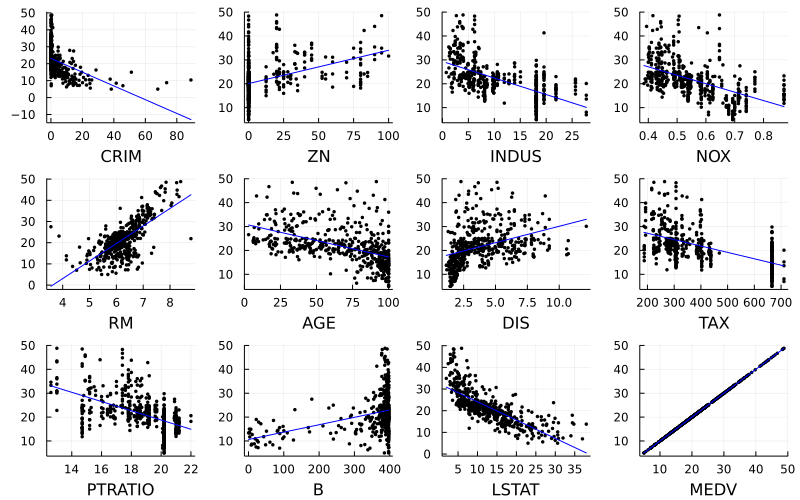

In [91]:
plots = []
for c in continuous
    x, y = (housing_ordered[!, c], housing_ordered[!, :MEDV])
    ax = scatter(x, y, xlabel=c, legend=false, markercolor=:black, markersize=2)
    m = cov(x, y) / var(x)
    b = mean(y) - m*mean(x)
    plot!(x, el -> b + m*el, linecolor=:blue)
    push!(plots, ax)
end
plot(plots..., layout=grid(3, 4), size=(800,500))